# Desafio Kaggle Titanic
### Grupo: 
#### Integrantes: Eric Gomes - William Lourenço - Silvestre Rocha


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [2]:
train.shape

(891, 12)

In [3]:
test.shape

(418, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


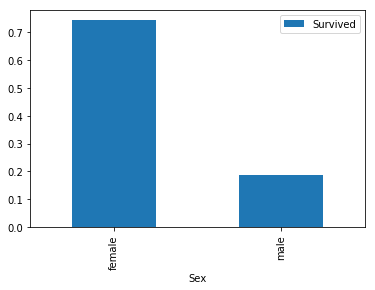

In [6]:
#verificando dados de Sexo dos passageiros
sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()

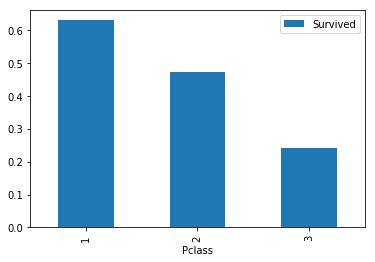

In [7]:
#Verificando a Classe do Passageiro para determinar o volume de sobreviventes
pclass_pivot = train.pivot_table(index='Pclass', values='Survived')
pclass_pivot.plot.bar()

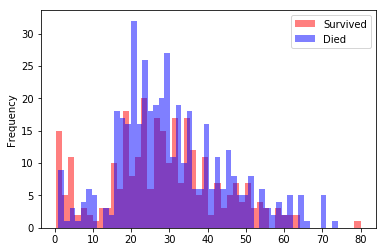

In [8]:
#Verificando a idade do passageiro para determinar o volume de sobreviventes
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]
survived['Age'].plot.hist(alpha=0.5, color='red', bins=50)
died['Age'].plot.hist(alpha=0.5, color='blue', bins=50)
plt.legend(['Survived', 'Died'])

In [9]:
#Tratamento de NaN e criação de ranges de idade
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

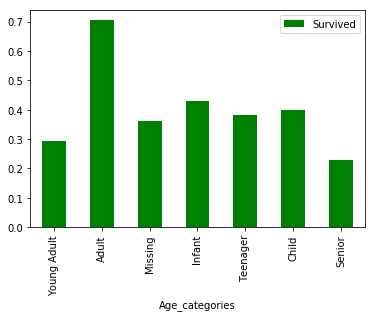

In [10]:
pivot = train.pivot_table(index='Age_categories', values='Survived')
pivot.plot.bar(color='g')

In [11]:
#removendo a relação numerica presente na coluna P class
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
#treinando o modelo
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
'Age_categories_Missing','Age_categories_Infant',
'Age_categories_Child', 'Age_categories_Teenager',
'Age_categories_Young Adult', 'Age_categories_Adult',
'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(train[columns], train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#avaliando o modelo
holdout = test
 
from sklearn.model_selection import train_test_split
 
all_X = train[columns]
all_y = train['Survived']
 
train_X, test_X, train_y, test_y = train_test_split(
all_X, all_y, test_size=0.20,random_state=0)

In [17]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8100558659217877


In [19]:
#usando cross validation para um medida de erro mais precisa
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76404494 0.76404494 0.7752809  0.78651685 0.8        0.80681818
 0.80898876 0.81111111 0.83146067 0.87640449]
0.8024670865963002


In [20]:
#fazendo previsões usando novos dados
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])
print(accuracy)

0.8024670865963002


In [54]:
previsao = pd.DataFrame()
previsao['Survived'] = holdout_predictions
previsao['PassengerId'] = test['PassengerId']
prev['PassengerId'] = previsao['PassengerId']
prev['Survived'] = previsao['Survived']
prev

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [55]:
prev.to_csv('previsao.csv', index=False)